This notebook is prepared by ApplAi's Technical And Training Depratment, Please 
Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

# Linear Regression:


---



---



## Introduction

In this exercise, you will implement Linear Regression algorithm to predict the price of houses using the size and apply it to Dataset with One feature represents the size in $m^2$. 
we strongly recommend Asking your colleagues and your Coach Using Questions And Discussions Channel on Microsoft Teams.

#### Run the next cell to import the needed libraries and to load the dataset and Plot Dataset


   Housesize  Houseprice
0   101.1101   1017.5920
1   100.5277   1009.1302
2   103.5186   1013.6620
3   102.0032   1011.8540
4   100.8598   1006.8233


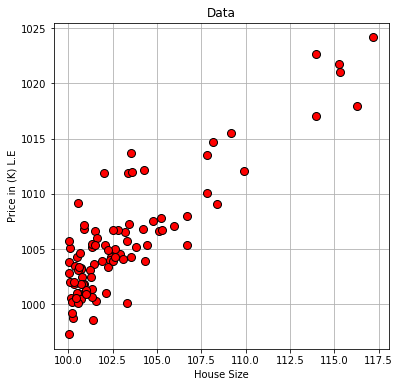

In [1]:
import numpy as np                          # Dealing with Numpy Arrays
import matplotlib.pyplot as plt             # matplotlib is used for ploting graphs
from IPython.display import HTML
import pandas as pd

# Lets the plots appears in the notebook
%matplotlib inline

Data = pd.read_csv(r'House_Price.csv')
iterations = 100

# Split the Data To X and Y where X is the input Feature (Size) and Y is the Output (Price)

print(Data.head()) #print first five rows 
cols=Data.shape[1] #the number of columns

X = np.array(Data.iloc[1:,0:cols-1]) #assign first column of dataset to x   "House size " then convert from dataframe to matrix
Y = np.array(Data.iloc[1:,cols-1:cols]) #assign second column of dataset to y  "House price"

X = X.reshape(X.shape[0],-1)
Y = Y.reshape(Y.shape[0],-1)

plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(True)

The Following Code illustrates the Shape of Data by printing the first 10 Examples, The First Column represents the input feature which is the size of the house, and the second column represents the output which is the Price of the house

In [2]:
# make sure that all data are correct 

print('Data : ')
print(Data.iloc[1:,:])

print('\n X : ')
print(X[:4])

print('\n Y : ')
print(Y[:4])

Data : 
    Housesize  Houseprice
1    100.5277  1009.13020
2    103.5186  1013.66200
3    102.0032  1011.85400
4    100.8598  1006.82330
5    103.3829  1011.88600
..        ...         ...
92   100.8707  1007.20290
93   100.3054  1001.98690
94   103.2934  1000.14454
95   108.3940  1009.05510
96   100.4369  1000.61705

[96 rows x 2 columns]

 X : 
[[100.5277]
 [103.5186]
 [102.0032]
 [100.8598]]

 Y : 
[[1009.1302]
 [1013.662 ]
 [1011.854 ]
 [1006.8233]]


## 1 - Predictive Line
Let's try to implement a hypothesis function which creates a line that we will use to predict any house price using it's size an input.
We can calculate the Predictions using the follwing formula by iterating over the training examples 

$$Prediction = \theta_0 + \theta_1 x$$

Which is equivalent to the Vectorized implementation 

$$Prediction = X. \theta \qquad \text{or}\qquad Prediction = \theta^T.X \qquad \text{According to Shapes of Matrices}$$


In [3]:
def Predictive_Line(X, Theta):

#     Theta should be with shape (2,1)
    
    Predictions = None
    
#     theta.shape  =>(2,1)  theta0 ,theta1     
#      X.shape   => (96,1) before adding ones 

    X = np.append(np.ones((1,X.shape[0])), X.reshape((1,X.shape[0])), axis = 0)
    
#     X.shape   => (2, 96)  after adding ones

  # ==================== YOUR CODE HERE =================================

    Predictions = np.dot(Theta.T, X) 
#     predictions.shape  => (1,2)*(2,96) ==>(1,96)
     
  # =====================================================================
  
    Predictions = Predictions.T
#    predictions.shape  => (96,1)     
    
    return Predictions

In [4]:
# theta1 and theta2  are random variable 
theta1=955
theta2=0.4

P = Predictive_Line(X,Theta = np.array([theta1,theta2]).reshape((2,1)))
print(P[:5])


[[995.21108]
 [996.40744]
 [995.80128]
 [995.34392]
 [996.35316]]


**Expected Output**:

<table style=>
    <tr>
        <td>  [995.44404]  </td>
    </tr>
    <tr>
        <td>  [995.21108]  </td>
    </tr>
    <tr>
        <td>  [996.40744]  </td>
    </tr>
    <tr>
        <td>  [995.80128]  </td>
    </tr>
    <tr>
        <td>  [995.34392]  </td>
    </tr>
</table>

In the Following Graph we used $\: \: \: \: Theta0 = 900, Theta1 = 1.1 \: \: \:$ which you can think of it as a random values that we will Change for better values that creates better Predictive line using Optimization Algorithm (Gradient Descent)

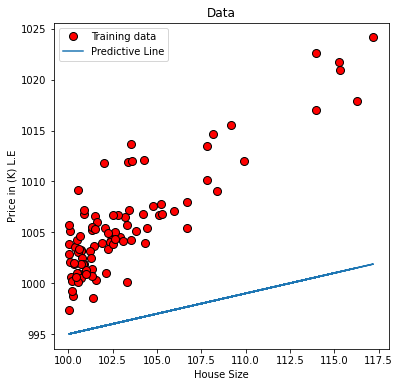

In [5]:
plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);

You May understand the importance of theta values when trying the create a new Predictive Line using diffrent Values of Theta

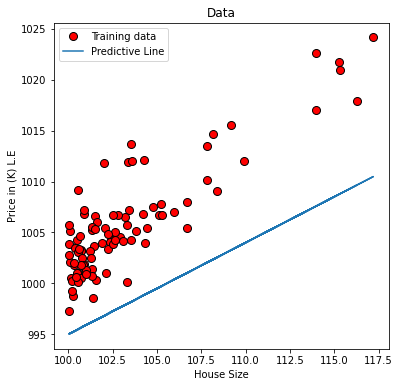

In [6]:
P = Predictive_Line(X = X,Theta = np.array([905, 0.9]).reshape((2,1)))

plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);

## 2 - Cost Function
We Can Use any of the Above Lines to Predict any house price by using it's size as an input but as you see the lines doesn't fit the data correctly so first we need to calculate the Total Error to know the value of the total error we have to try to decrease that error value.
We are going to use Mean Square Error Method to calculate how good is our Linear Regression Model (Predictive Line)

$$ J = \frac{1}{2m} \sum_{i=1}^m \left( P(x^{(i)}) - y^{(i)}\right)^2$$
Where <br>
$J \:$ is the Cost Value <br>
$m \:$ is the number of training examples <br>
$i \:$ is the iterative variable which iterate over the training example <br>
$P \:$ is the predicted values of the points <br>
$y \:$ is the Real values of the points <br>



In [7]:
def Calculate_Cost(X, Theta, Y):
    m = Y.shape[0]
    J = 0
  # ==================== YOUR CODE HERE =================================
    h = Predictive_Line(X, Theta)
    J = ((1/(2 * m)) * np.sum(np.square(h - Y), axis = 0))
  # ===================================================================== 
    return J

In [8]:
print('First Line Cost = ')
print(Calculate_Cost(X = X,Y = Y,Theta = np.array([955, 0.4]).reshape((2,1))))
print('\nSecond Line Cost = ')
print(Calculate_Cost(X = X,Y = Y,Theta = np.array([905, 0.9]).reshape((2,1))))

First Line Cost = 
[52.9978684]

Second Line Cost = 
[35.03366079]


**Expected Output**:

<table style=>
    <tr>
        <td>  First Line Cost = 54.9800147658226  </td>
    </tr>
    <tr>
        <td>  Second Line Cost = 37.07585893908035  </td>
    </tr>
</table>

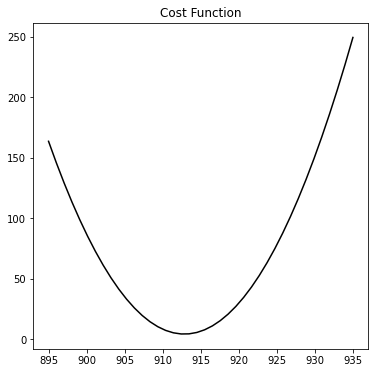

In [9]:
Theta0_Grid = np.linspace(895,935,num = 40)
Theta1_Grid = np.ones(len(Theta0_Grid)) * 0.9
Theta0_Grid = Theta0_Grid.reshape((Theta0_Grid.shape[0],-1))
Theta1_Grid = Theta1_Grid.reshape((Theta1_Grid.shape[0],-1))
Theta = np.append(Theta0_Grid, Theta1_Grid, axis = 1)
J_grid = Calculate_Cost(X= X, Theta = Theta.T , Y = Y)
plt.figure(figsize=(6, 6))
plt.plot(Theta0_Grid, J_grid, 'k')
plt.title('Cost Function')
plt.grid(False)


## 3 - Gradient Descent
As we can observe from the graph and from the Cost Value, The Second Line Performs better than the first line, and the diffrence between them is the values of theta, so Let's try to get a better Line in a systematic way using gradient descent algorithm instead of just trying diffrent values of Thetas.

As we have seen the latest Concave shaped graph represents the Cost Function values while changing Theta0 but making Theta1 Constant to make it easier to understand.
Let's observe the point **R** in the following gif

In [10]:
HTML('<img src=https://media.giphy.com/media/f3vn9xqwDjGwqcW0YJ/giphy.gif width="400" height="300">')

let's say that we have initialized Theta0 randomly at the first value of Theta that point **R** started with, it had a very high cost function which means when we use this value of theta to generate Predictive line it won't be good enough and will do un-accurate predictions.
As we noticed when the value of Theta0 **increases** the Cost Function or the Error **Decreases** till we reach the minimum Point

But what if the randomly initialized variable was at the right side of the minimum Point ?

In [11]:
HTML('<img src=https://media.giphy.com/media/L0f2cnZwRICHUuexD7/giphy.gif width="400" height="300">')

Just Unlike **R** when the value of Theta0 of point **S** Decreases the Cost Function or the Error **Decreases** till we reach the minimum Point.

So in order to know if we should **increase** or **decrease** Theta in order to **Decrease** the cost value we will use the Derivative in which if the value of the derivative of the cost function in a certain point is 
- **Negative (-ve)** that means we have to **increase** the Theta in order to **Decrease** the Cost Value.
- **Positive (-ve)** that means we have to **Decrease** the Theta in order to **Decrease** the Cost Value.

Take a look at the following equation you may think that $\alpha$ Variable is a variable that controls the step amount that means how much we will increase/decrease Theta
 
$$θ_j := θ_j − α\frac{∂}{∂θ_j}J(θ)$$

Note : This part of the Equation ($\frac{∂}{∂θ_j}J(θ)$) means the Partial derivative of the Cost function, it's given to you without having to do mathematical proof, but if you already know partial derivative rules you may give it a try 

After Calculating the Derivative of the Cost Function we will have our Update rule of Gradient Descent is 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left(P(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$
Let's Try to implement the Gradient Descent to get the best Thetas values that fits the Best Line

In [12]:
def Gradient_Descent(X, Y, Theta, alpha, num_iters):

#     Y.shape  =>(96,1)
    m = Y.shape[0]   #m=96
    
        # ==================== YOUR CODE HERE =================================
#     X1 = np.append(np.ones(X.shape) , X, axis = 1)
    
    for i in range(num_iters):
        h = Predictive_Line(X, Theta.reshape((2,1)))
        Theta=Theta.reshape((2,1))
        theta0=Theta[0,0]-(alpha/m)* np.sum((h - Y), axis = 0)
        theta1=Theta[1,0]-(alpha/m)* np.sum(((h - Y)*X), axis = 0)
        Theta=np.array([theta0,theta1]).reshape((1,2))
        
#         Theta = Theta - (alpha / m) * ((h - Y).T).dot(X1)
        # =====================================================================
        
    return Theta

In [13]:
Theta = Gradient_Descent(X, Y, Theta = np.array([900,0.4]).reshape((1,2)), alpha = 0.0001,num_iters= 10000)

P = Predictive_Line(X, Theta.T)

Cost = Calculate_Cost(X, Theta.T, Y)
print('Theta = ' + str(Theta))
print( 'Cost = '+str(Cost))

Theta = [[899.97875106   1.02504415]]
Cost = [3.72524252]


**Expected Output**:


<table style=>
    <tr>
        <td>  Theta = : [[899.98210241   1.02637825]]  </td>
    </tr>
    <tr>
        <td>  Cost = [4.6830858]  </td>
    </tr>
</table>

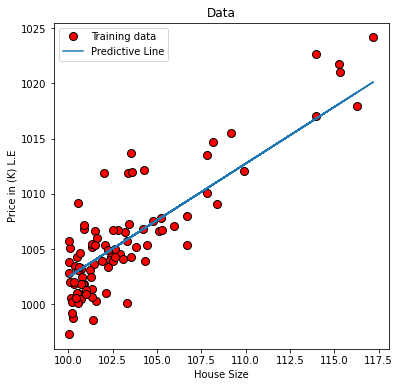

In [14]:
plt.figure(figsize=(6, 6))
plt.plot(X, Y, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('House Size')
plt.ylabel('Price in (K) L.E')
plt.grid(False)
plt.plot(X, P, '-')
plt.legend(['Training data', 'Predictive Line']);